### Relationship between US Treasury 10Y-3M Yield Curve, US recessions and the SPX Stock Market Index

Data Source: US Federal Reserve, NBER, YCharts 


#### Import Libraries

In [1]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd

import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
from matplotlib.dates import DateFormatter
from matplotlib import ticker
%matplotlib inline
import seaborn as sns # Plotting

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance
import time

# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

#### Return Dataframe from a CSV file

In [2]:
PATH = (r"C:/Users/User/Documents/Chartbook/Yield curve/")
def get_df_from_csv(data_source):
    try:
        df = pd.read_csv(PATH + data_source + ".csv") # index_col='date', parse_dates=True
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df

#### Calculate and plot historical yield diference between 10 year and 3 month US Treasury securities

Data has monthly sampling. 

In [3]:
# get historical market yields for 3-Month an 10-Year US Treasury
df1 = get_df_from_csv('TB3MS')
df1['Date'] = pd.to_datetime(df1.Date, format = '%d/%m/%Y')
df2 = get_df_from_csv('10Y Treasury Yield')
df2['Date'] = pd.to_datetime(df1.Date, format = '%m/%d/%Y')

In [4]:
# merge dataframes across 'Date' columns
mult_df = pd.merge(df1, df2, on='Date')
mult_df

,Date,3M_UST,10Y_UST
0,2023-02-01,4.66,3.397
1,2023-01-01,4.54,3.530
2,2022-12-01,4.25,3.620
3,2022-11-01,4.15,3.890
4,2022-10-01,3.72,3.980
...,...,...,...
1065,1934-05-01,0.16,3.010
1066,1934-04-01,0.15,3.040
1067,1934-03-01,0.24,3.070
1068,1934-02-01,0.62,3.090


In [5]:
# calculate yield differential: 10Y UST yield - 3M UST yield 
mult_df['yield_diff'] = mult_df['10Y_UST'] - mult_df['3M_UST']
mask = mult_df['yield_diff'] < 0
# add column where 3M yield is higher than 10Y yield
mult_df['yield_neg'] = np.where(mask, mult_df['yield_diff'], 0)
mult_df

,Date,3M_UST,10Y_UST,yield_diff,yield_neg
0,2023-02-01,4.66,3.397,-1.263,-1.263
1,2023-01-01,4.54,3.530,-1.010,-1.010
2,2022-12-01,4.25,3.620,-0.630,-0.630
3,2022-11-01,4.15,3.890,-0.260,-0.260
4,2022-10-01,3.72,3.980,0.260,0.000
...,...,...,...,...,...
1065,1934-05-01,0.16,3.010,2.850,0.000
1066,1934-04-01,0.15,3.040,2.890,0.000
1067,1934-03-01,0.24,3.070,2.830,0.000
1068,1934-02-01,0.62,3.090,2.470,0.000


''

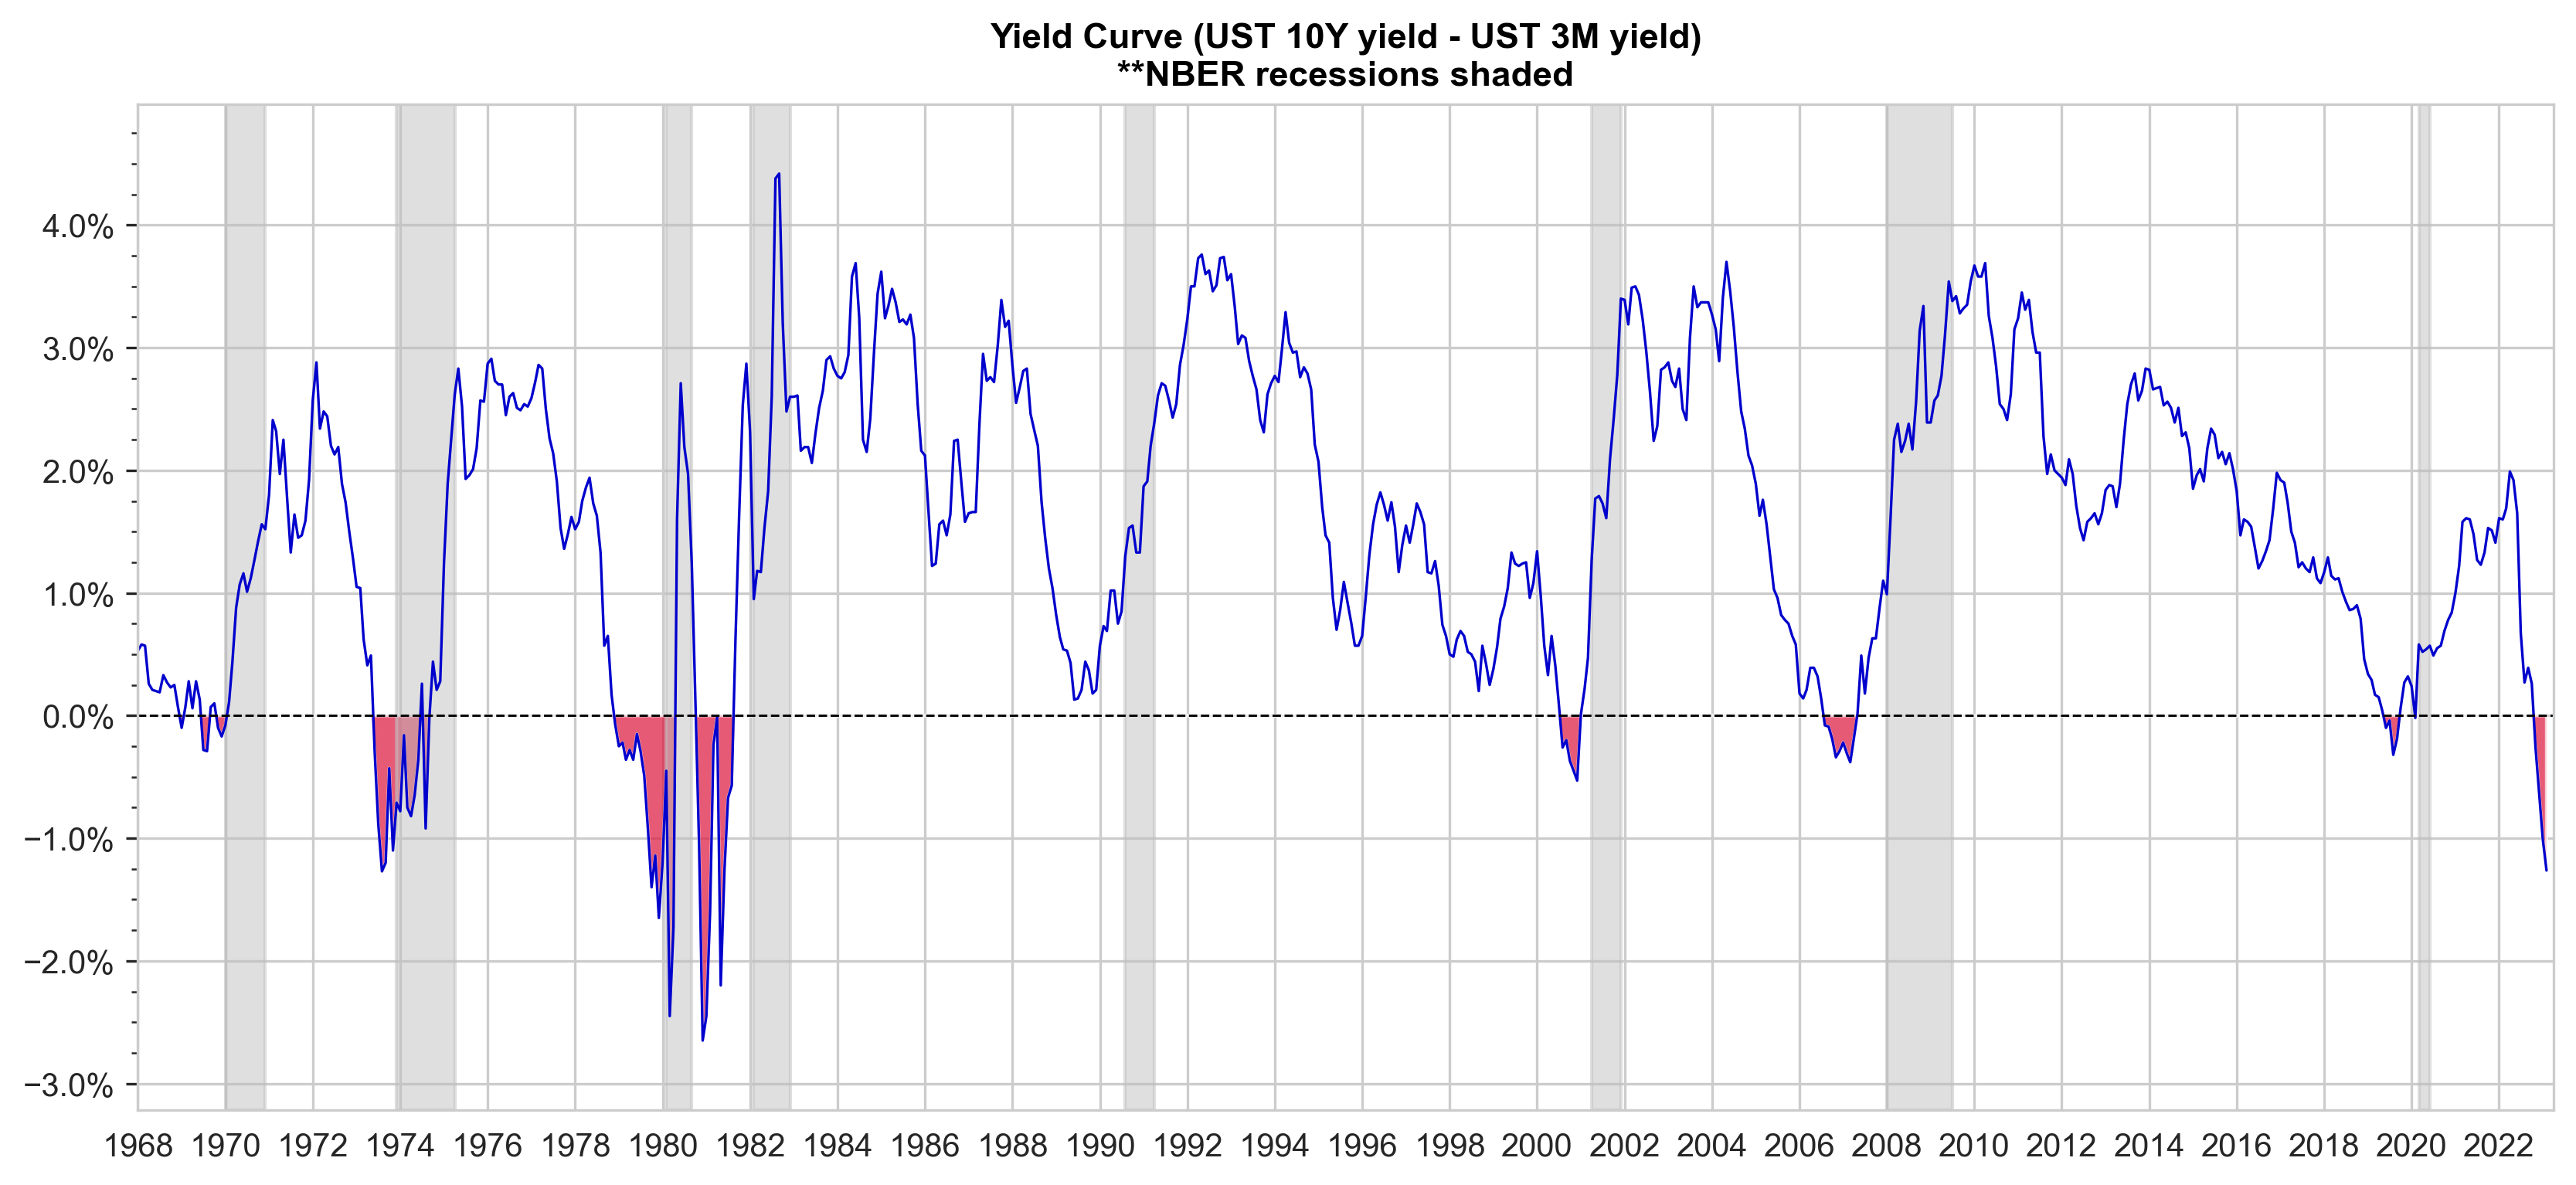

In [9]:
# plot with matplotlib and seaborn
plt.figure(figsize=(11, 5), dpi=300) # plot size
plt.rcParams['figure.constrained_layout.use'] = True # automatically adjusts and fit layout 

plt.margins(0, 0.08) # manually fit x and y series inside plot area, or use autoscaling bellow. 
#plt.autoscale(enable=None, axis="x", tight=True)

font = {'family':'sans-serif',
        'name': 'arial',
        'color':  'black',
        'weight': 'normal',
        'size': 11,
        }

sns.set_style("whitegrid") # setting grid style with seaborn
plt.plot(mult_df.Date, mult_df.yield_diff, c='mediumblue', lw=0.8) # plot series
plt.gca().set_xlim([dt.datetime(1968, 1, 1), dt.datetime(2023, 4, 1)]) # x-axis view limits
plt.axhline(y = 0, color = 'black', lw=0.7, linestyle = '--') # add zero line

plt.fill_between(mult_df.Date, mult_df.yield_neg, 0, alpha=0.7, color='crimson', edgecolor=None) # fill negative values
plt.axvspan(dt.datetime(2020,3,1), dt.datetime(2020,5,31), alpha=0.5, color='silver') # add recession period
plt.axvspan(dt.datetime(2008,1,1), dt.datetime(2009,7,1), alpha=0.5, color='silver') # add recession period
plt.axvspan(dt.datetime(2001,4,1), dt.datetime(2001,12,1), alpha=0.5, color='silver') # add recession period
plt.axvspan(dt.datetime(1990,8,1), dt.datetime(1991,4,1), alpha=0.5, color='silver') # add recession period
plt.axvspan(dt.datetime(1982,1,31), dt.datetime(1982,12,1), alpha=0.5, color='silver') # add recession period
plt.axvspan(dt.datetime(1980,1,31), dt.datetime(1980,8,31), alpha=0.5, color='silver') # add recession period
plt.axvspan(dt.datetime(1973,12,1), dt.datetime(1975,4,1), alpha=0.5, color='silver') # add recession period
plt.axvspan(dt.datetime(1970,1,1), dt.datetime(1970,12,1), alpha=0.5, color='silver') # add recession period

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # format x-axis dates (%d-%m-%Y)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2)) # x-axis datetime interval

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1)) # major tick position
plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(0.25)) # minor tick position
plt.gca().yaxis.set_ticks_position('left') # tick placement 
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100)) # format y-axis tick label as percentage

plt.xlabel=None
plt.ylabel=None
plt.title('Yield Curve (UST 10Y yield - UST 3M yield)\n**NBER recessions shaded', loc='center', fontdict=font, weight='bold')
;


**Comment**: Yield curve inversion appears to be a reliable recessionary indicator. 

Although not represented on the chart above, it is worth noting that the yield curve had historicaly re-inverted into a recession with the **front-end (3M to 2Y maturity) rates decreasing**. Back-end rates steepener is **not the historical norm**, even during inflationary periods. 

### How well did the SPX Index perform during and following yield curve inversions? 

SPX data is not inflation adjusted.

In [11]:
# get historical SPX Close prices
SPX_df = get_df_from_csv('SPX Historical Daily Prices')
SPX_df['Date'] = pd.to_datetime(SPX_df.Date)
SPX_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1968-01-02 00:00:00-05:00,0.000000,97.330002,95.309998,96.110001,11080000,0.0,0.0
1,1968-01-03 00:00:00-05:00,0.000000,96.949997,95.040001,95.669998,12650000,0.0,0.0
2,1968-01-04 00:00:00-05:00,0.000000,96.230003,94.309998,95.360001,13440000,0.0,0.0
3,1968-01-05 00:00:00-05:00,0.000000,96.660004,94.970001,95.940002,11880000,0.0,0.0
4,1968-01-08 00:00:00-05:00,0.000000,97.400002,95.540001,96.620003,14260000,0.0,0.0
...,...,...,...,...,...,...,...,...
13868,2023-02-06 00:00:00-05:00,4119.569824,4124.629883,4093.379883,4111.080078,4114240000,0.0,0.0
13869,2023-02-07 00:00:00-05:00,4105.350098,4176.540039,4088.389893,4164.000000,4355860000,0.0,0.0
13870,2023-02-08 00:00:00-05:00,4153.470215,4156.850098,4111.669922,4117.859863,4029820000,0.0,0.0
13871,2023-02-09 00:00:00-05:00,4144.250000,4156.229980,4069.669922,4081.500000,4270200000,0.0,0.0


''

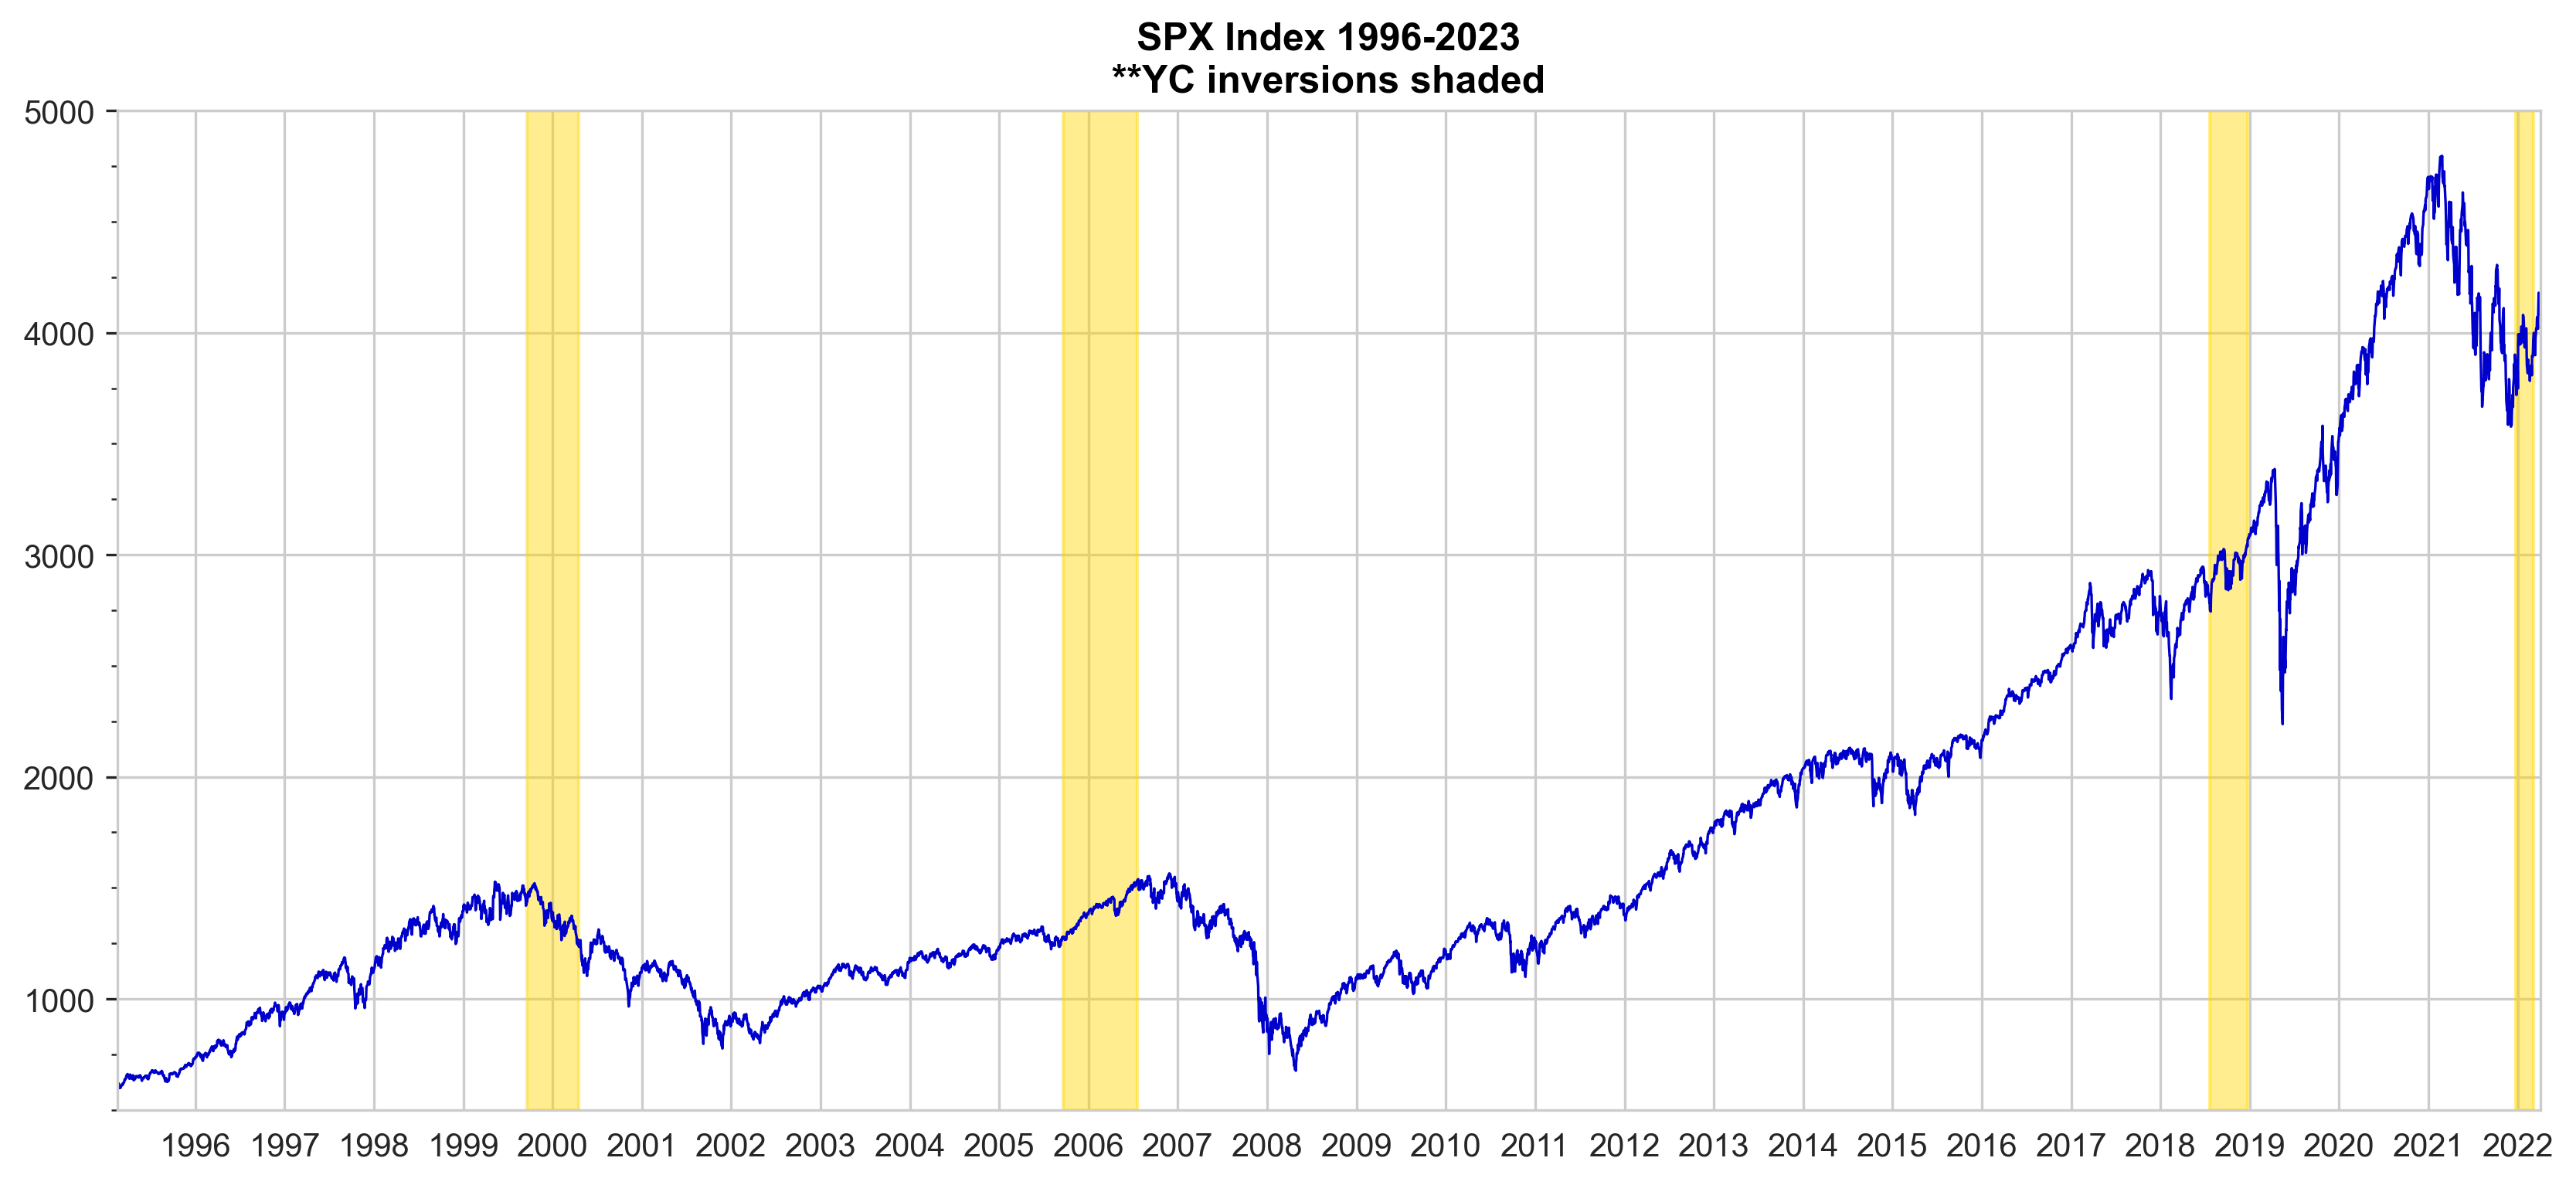

In [15]:
# plot with matplotlib and seaborn
plt.figure(figsize=(11, 5), dpi=300) # plot size
plt.rcParams['figure.constrained_layout.use'] = True # automatically adjusts and fit layout 

#plt.margins(0, 0.14) # manually fit x and y series inside plot area, or use autoscaling bellow. 
plt.autoscale(enable=None, axis="x", tight=True)

font = {'family':'sans-serif',
        'color':  'black',
        'name': 'arial',
        'weight': 'normal',
        'size': 12,
        }

sns.set_style("whitegrid") # setting grid style with seaborn
plt.plot(SPX_df.Date, SPX_df.Close, c='mediumblue', lw=0.8) # plot series
plt.gca().set_xlim([dt.datetime(1996, 1, 1), dt.datetime(2023, 2, 10)]) # x-axis view limits
plt.gca().set_ylim(500, 5000) # y-axis view limits

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # format x-axis dates (%d-%m-%Y)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=365)) # x-axis date interval

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1000)) # major tick position
plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(250)) # minor tick position
plt.gca().yaxis.set_ticks_position('left') # tick placement 

plt.axvspan(dt.datetime(2022,10,31), dt.datetime(2023,1,13), alpha=0.435, color='gold') # YC inversion
plt.axvspan(dt.datetime(2019,5,31), dt.datetime(2019,10,31), alpha=0.435, color='gold') # YC inversion
plt.axvspan(dt.datetime(2006,7,31), dt.datetime(2007,5,31), alpha=0.435, color='gold') # YC inversion
plt.axvspan(dt.datetime(2000,7,31), dt.datetime(2001,2,28), alpha=0.435, color='gold') # YC inversion

plt.xlabel=None
plt.ylabel=None
plt.title('SPX Index 1996-2023\n**YC inversions shaded', loc='center', fontdict=font, weight='bold')
;

''

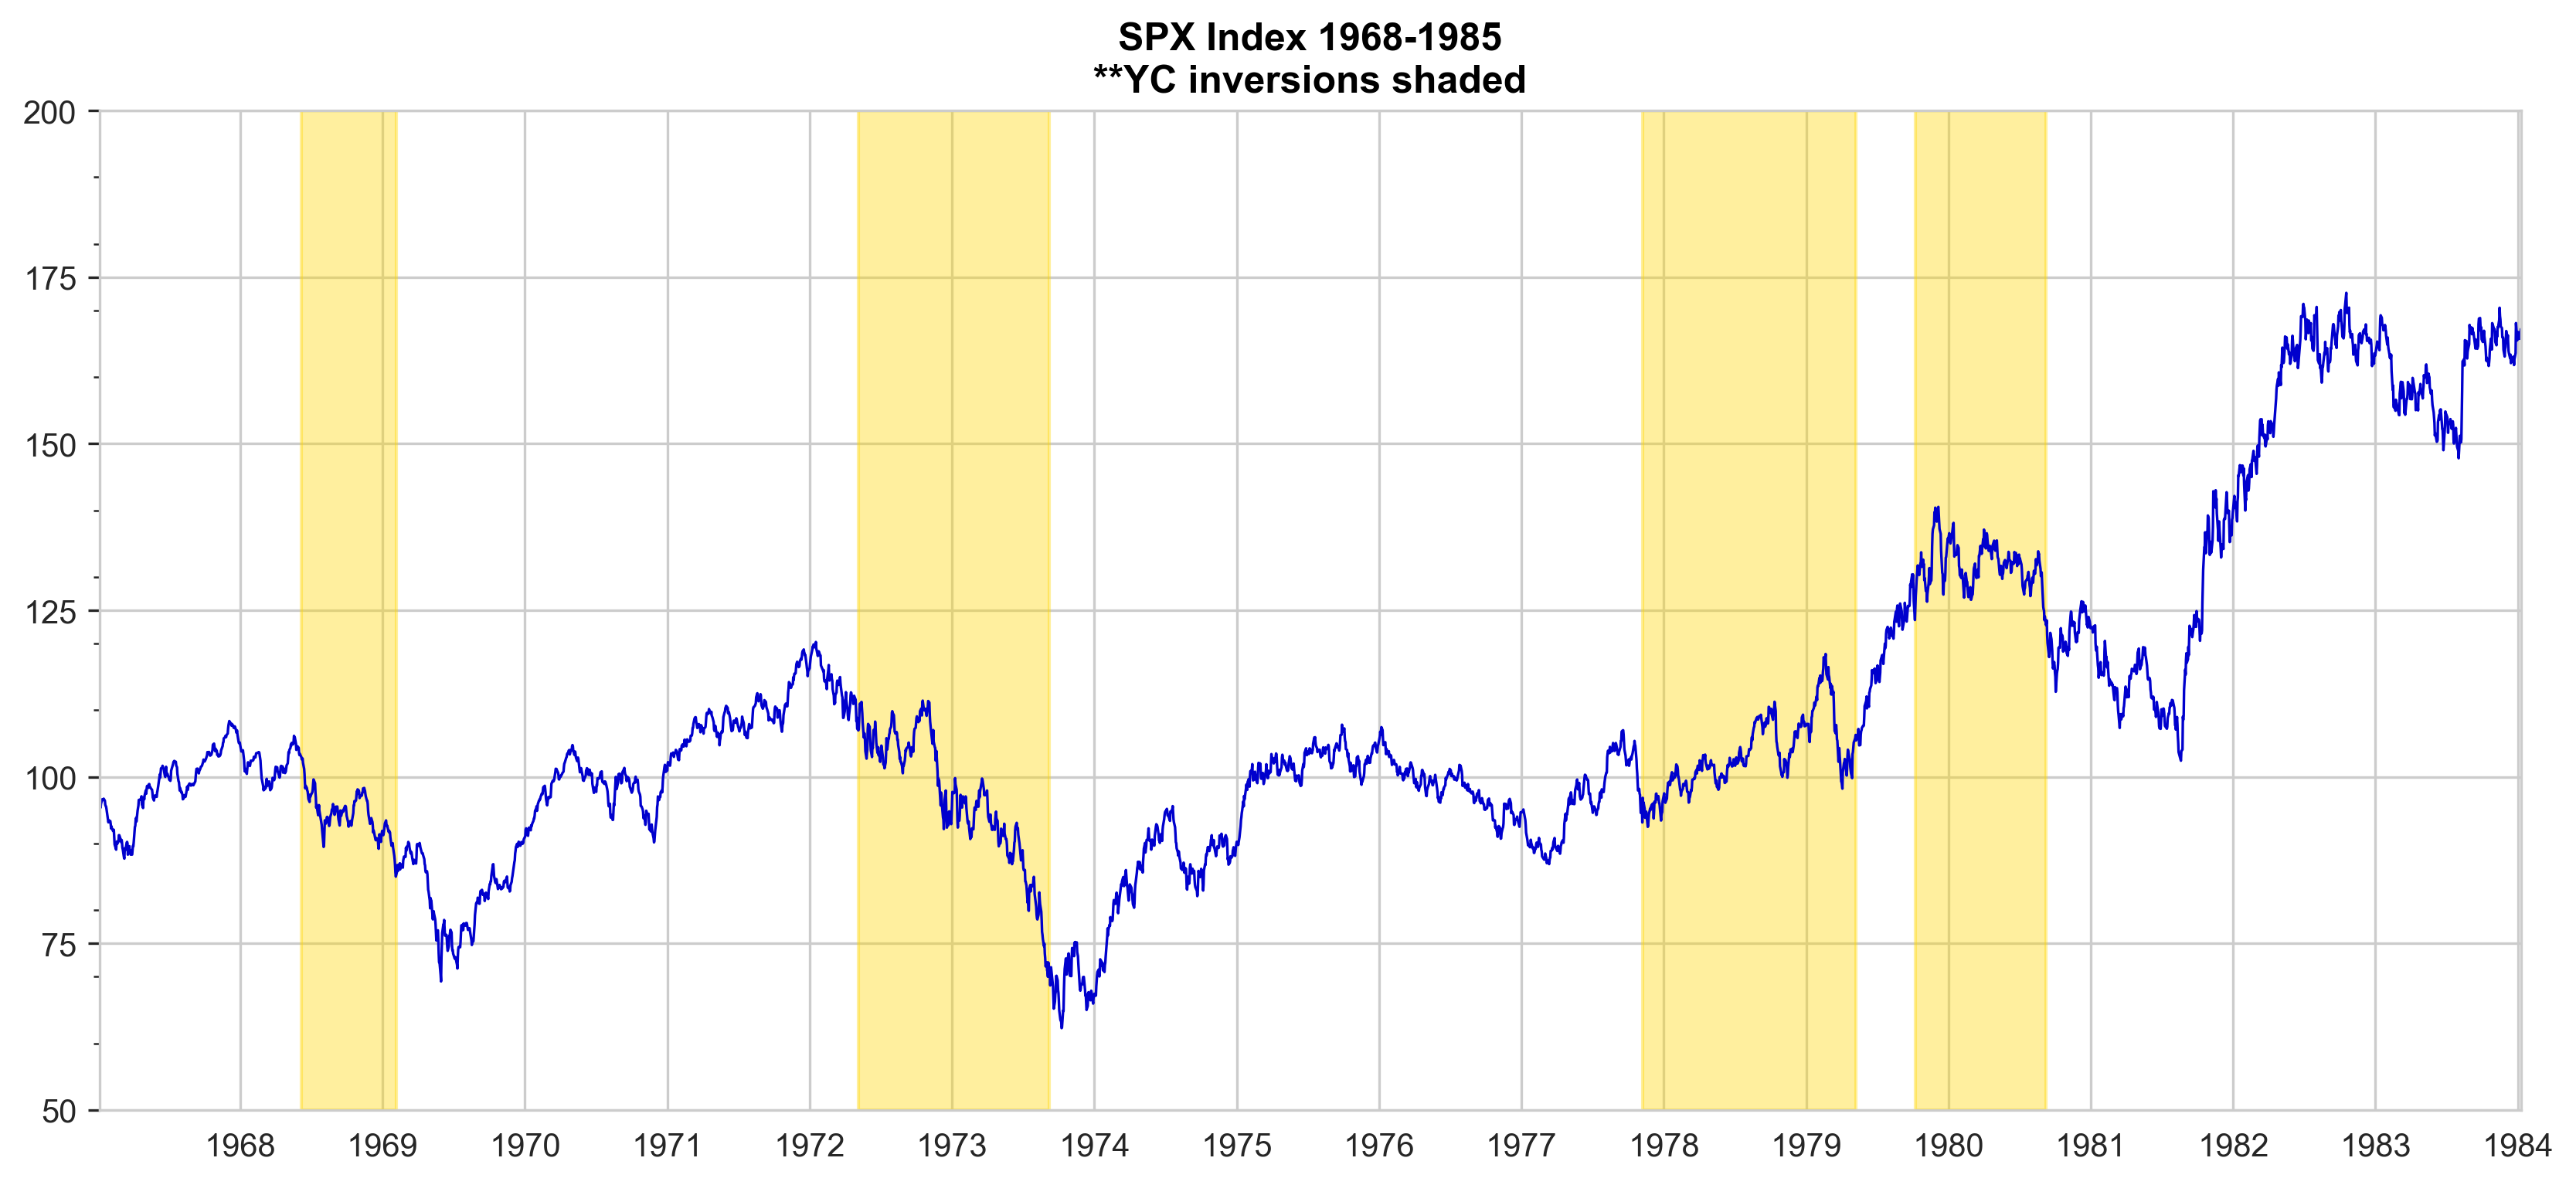

In [18]:
# plot with matplotlib and seaborn
plt.figure(figsize=(11, 5), dpi=300) # plot size
plt.rcParams['figure.constrained_layout.use'] = True # automatically adjusts and fit layout 

#plt.margins(0, 0.14) # manually fit x and y series inside plot area, or use autoscaling bellow. 
plt.autoscale(enable=None, axis="x", tight=True)

font = {'family':'sans-serif',
        'color':  'black',
        'name': 'arial',
        'weight': 'normal',
        'size': 12,
        }

sns.set_style("whitegrid") # setting grid style with seaborn
plt.plot(SPX_df.Date, SPX_df.Close, c='mediumblue', lw=0.8) # plot series
plt.gca().set_xlim([dt.datetime(1968, 1, 1), dt.datetime(1985, 1, 1)]) # x-axis view limits
plt.gca().set_ylim(50, 200) # y-axis view limits

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # format x-axis dates (%d-%m-%Y)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=365)) # x-axis date interval

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(25)) # major tick position
plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(10)) # minor tick position
plt.gca().yaxis.set_ticks_position('left') # tick placement 

plt.axvspan(dt.datetime(1980,10,1), dt.datetime(1981,9,1), alpha=0.38, color='gold') # YC inversion
plt.axvspan(dt.datetime(1978,11,1), dt.datetime(1980,5,1), alpha=0.38, color='gold') # YC inversion
plt.axvspan(dt.datetime(1973,5,1), dt.datetime(1974,9,1), alpha=0.38, color='gold') # YC inversion
plt.axvspan(dt.datetime(1969,6,1), dt.datetime(1970,2,1), alpha=0.38, color='gold') # YC inversion

plt.xlabel=None
plt.ylabel=None
plt.title('SPX Index 1968-1985\n**YC inversions shaded', loc='center', fontdict=font, weight='bold')
;

**Comment:** Generally speaking, inverted yield curve is a sign of weak current and future economic and market conditions, often indicating a slowdown or negative earnings growth. Inverted yield curve appears to be a better predictor of weak future SPX performance during periods with stronger disinflationary pressures and negative or neutral real reference funding rates. These periods are generally marked by slow or sub-optimal **nominal** economic growth. However, multi year periods of higher and trending PPI/CPI inflation (1972 - 1982), irrespective of the underlying inflation drivers, can result in higher nominal corporate earnings due to the cost pass on effects, which does on average positively impact the indexes performance. These periods can be marked by slow or negative **real**/stagflationary economic growth.     

Alternatively, deep yield curve inversion can simply be interpreted as a shortage of Treasury collateral in the global financial system, which is used for Repo lending and derivative transactions. Furthermore, Basel III-Solvency II regulation has demanded that Financial Institutions (Banks, Insurance Companies) hold more safe assets (US 10Y Note, German Bunds etc.).  

Moving forward, we may experience an even deeper yield curve inversion, as the pressure to re-finance at higher funding rates, assuming reference rates stay higher for longer, results in a stronger demand for Treasury collateral underpinning these re-finance transactions.